In [ ]:
#!pip install pytrends

In [15]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

In [2]:
pytrend = TrendReq()

In [44]:
pytrend.build_payload(kw_list=['финтех'], geo='RU', timeframe='2014-01-01 2020-01-01')
df = pytrend.interest_by_region()

In [69]:
a = list(pytrend.related_queries()['финтех']['top']['query'])

In [83]:
a.remove('финтех')

In [84]:
combo = TrendReq()
combo.build_payload(kw_list = a, geo='RU', timeframe='2014-01-01 2020-01-01')

In [85]:
df1 = combo.interest_over_time()

In [45]:
df = pytrend.interest_over_time()

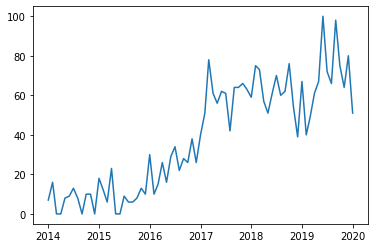

In [53]:
plt.plot(df.index, df['финтех'])
plt.show()

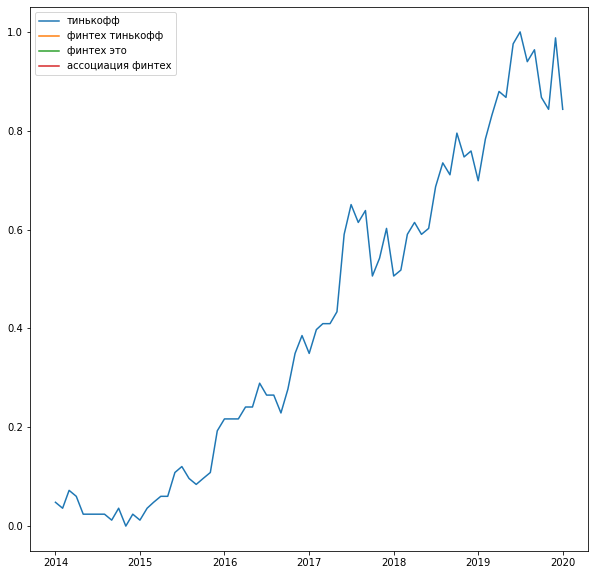

In [86]:
fig = plt.figure(figsize=(10,10))
for i in a:
    plt.plot(df1.index, (df1[i] - min(df1[i]))/(max(df1[i]) - min(df1[i])), label=i)
plt.legend()
plt.show()

In [88]:
fint = TrendReq()
crypt = TrendReq()
pls = TrendReq()

In [89]:
fint.build_payload(kw_list = ['финтех'], geo='RU', timeframe='2014-01-01 2020-01-01')
crypt.build_payload(kw_list = ['криптовалюты', 'биткоин'], geo='RU', timeframe='2014-01-01 2020-01-01')
pls.build_payload(kw_list = ['платежные системы'], geo='RU', timeframe='2014-01-01 2020-01-01')

In [96]:
fin = fint.interest_over_time().drop('isPartial', axis=1).join(
    crypt.interest_over_time().drop('isPartial', axis=1), on = 'date').join(
pls.interest_over_time().drop('isPartial', axis=1), on = 'date')

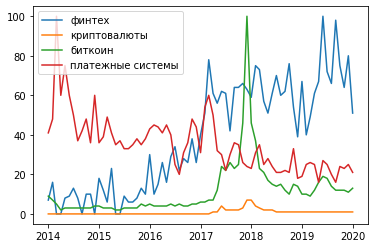

In [108]:
for i in fin.columns:
    plt.plot(fin.index, fin[i], label = i)
plt.legend()
plt.show()